<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/HedonicPricingCorinnaKeum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("airbnb_hw.csv")

# Display the first few rows
df.head()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [6]:
# Convert 'Host Since' to datetime and drop rows with missing values
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
df.dropna(subset=['Host Since'], inplace=True)

# Fill missing 'Review Scores Rating' and 'Review Scores Rating (bin)' with median or placeholders
df['Review Scores Rating'].fillna(df['Review Scores Rating'].median(), inplace=True)
df['Review Scores Rating (bin)'].fillna('Unknown', inplace=True)

# Convert 'Zipcode' to string and fill missing values with a placeholder
df['Zipcode'] = df['Zipcode'].fillna("Unknown").astype(str)

# Convert 'Price' to numeric by removing any non-numeric characters, then cast to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing 'Beds' with median value
df['Beds'].fillna(df['Beds'].median(), inplace=True)


# Verify data types and missing values
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 30475 entries, 3 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30472 non-null  object        
 5   Review Scores Rating (bin)  30475 non-null  object        
 6   Room Type                   30475 non-null  object        
 7   Zipcode                     30475 non-null  object        
 8   Beds                        30475 non-null  float64       
 9   Number of Records           30475 non-null  int64         
 10  Number Of Reviews           30475 non-null  int64         
 11  Price                       30475 non-null  float64       


<ipython-input-6-ad15c91dc90e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Scores Rating'].fillna(df['Review Scores Rating'].median(), inplace=True)
<ipython-input-6-ad15c91dc90e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Missing values per column:
 Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
Host Duration                 0
dtype: int64

Summary statistics:
             Host Id                     Host Since          Beds  \
count  3.047500e+04                          30475  30475.000000   
mean   1.273040e+07  2013-06-29 17:56:15.317473024      1.528663   
min    5.000000e+02            2008-06-26 00:00:00      0.000000   
25%    2.700193e+06            2012-06-21 00:00:00      1.000000   
50%    8.551260e+06            2013-09-01 00:00:00      1.000000   
75%    2.119605e+07            2014-09-12 00:00:00      2.000000   
max    4.3033

<ipython-input-9-c5e62670d43f>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Type'].fillna(df['Property Type'].mode()[0], inplace=True)


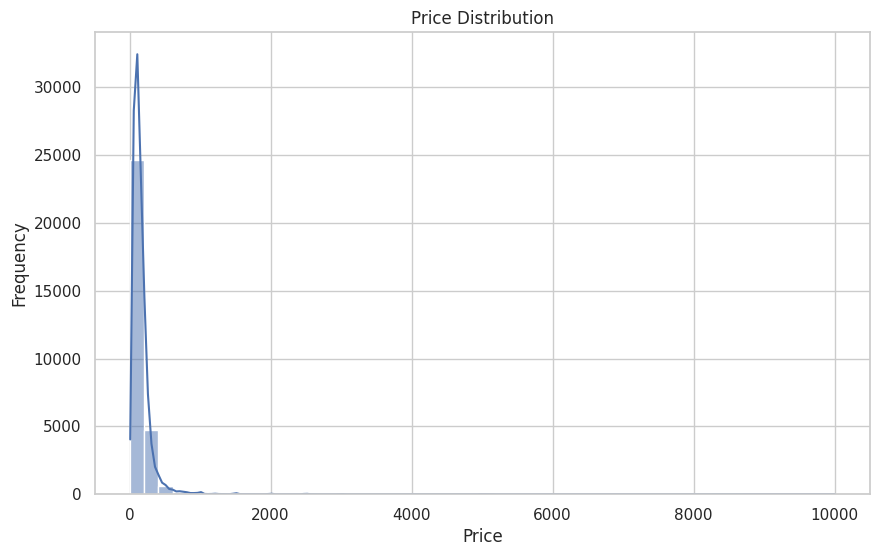

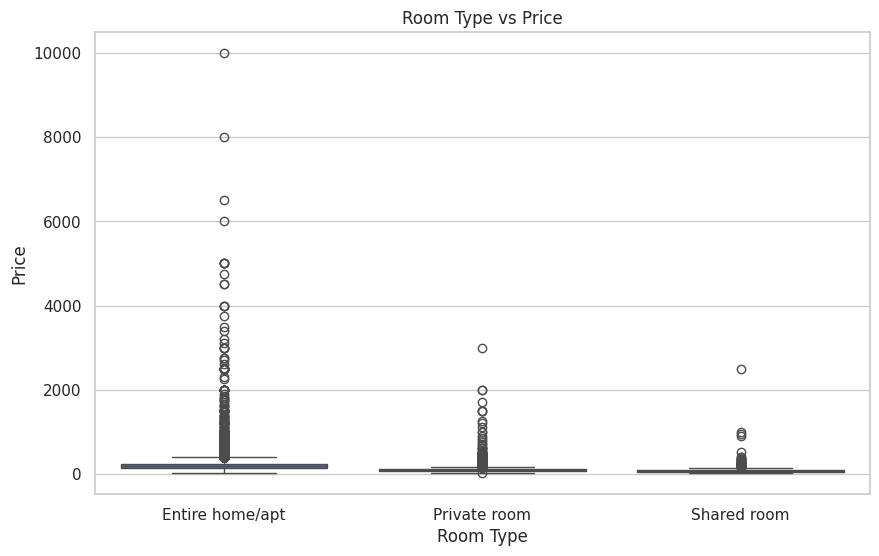

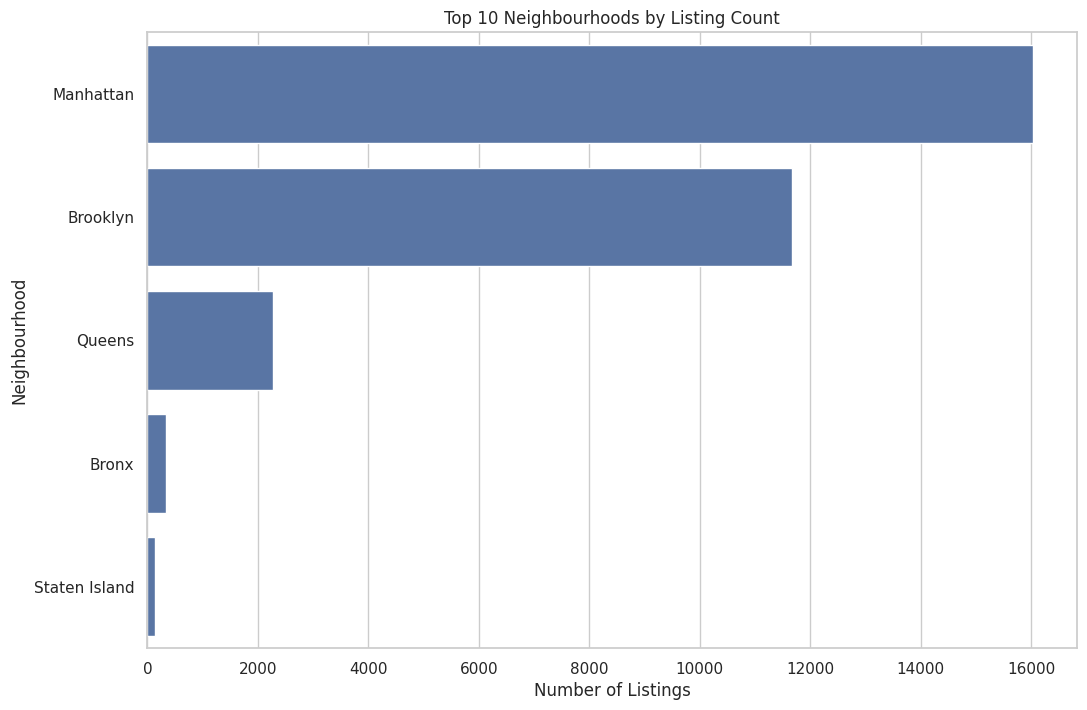

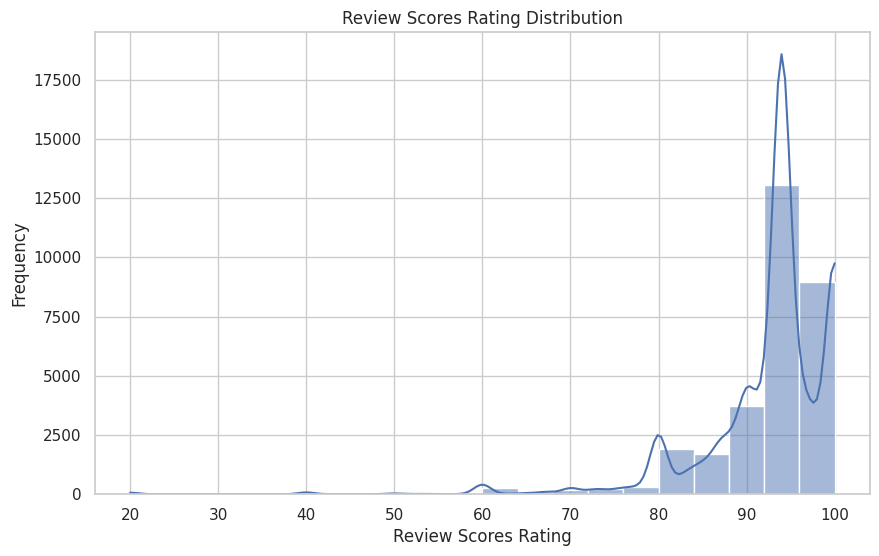

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Strip whitespace from column names
df.columns = df.columns.str.strip()


# Convert 'Host Since' to datetime
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')

# Fill missing values in 'Property Type' with the most frequent value
df['Property Type'].fillna(df['Property Type'].mode()[0], inplace=True)

# Calculate 'Host Duration' as the time difference from 'Host Since' to today
df['Host Duration'] = (pd.Timestamp.today() - df['Host Since']).dt.days

# Step 2: EDA
# Summary statistics for numeric columns
print("\nSummary statistics:\n", df.describe())

# Unique values for categorical columns
categorical_columns = ['Neighbourhood', 'Property Type', 'Room Type', 'Review Scores Rating (bin)']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", df[col].value_counts())

# Step 3: Visualization

# Set style
sns.set(style="whitegrid")

# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Room Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Room Type', y='Price', data=df)
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# 3. Neighbourhood Analysis
plt.figure(figsize=(12, 8))
sns.countplot(y='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().index[:10])
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

# 4. Review Scores Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Scores Rating'], bins=20, kde=True)
plt.title('Review Scores Rating Distribution')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()



In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
# Prepare the feature matrix and target variable
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood']], drop_first=True)
y = df['Price']

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get the coefficient for Review Scores Rating
coef_review_scores = model.coef_[0]  # assuming it's the first feature

# Analyze coefficients for the property types
property_types = pd.Series(model.coef_[1:])  # exclude Review Scores Rating

# Find the most expensive property type
most_expensive_property_type = property_types.idxmax()
most_expensive_coefficient = property_types.max()

# Output results
print(f"RMSE on the test set: {rmse:.2f}")
print(f"Coefficient on Review Scores Rating: {coef_review_scores:.2f}")
print(f"Most expensive property type: {most_expensive_property_type} with a coefficient of {most_expensive_coefficient:.2f}")



RMSE on the test set: 179.21
Coefficient on Review Scores Rating: 1.30
Most expensive property type: 1 with a coefficient of 101.19


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the target and feature variables
target_column = 'Price'  # Replace with actual target column name
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of features for simple models
# Model 1: Using only 'Beds' as predictor
X_train_beds = X_train[['Beds']]
X_test_beds = X_test[['Beds']]

# Model 2: Using only 'Number Of Reviews' as predictor
X_train_reviews = X_train[['Number Of Reviews']]
X_test_reviews = X_test[['Number Of Reviews']]

# Model 3: Using 'Beds' and 'Number Of Reviews' as predictors
X_train_beds_reviews = X_train[['Beds', 'Number Of Reviews']]
X_test_beds_reviews = X_test[['Beds', 'Number Of Reviews']]

# Dictionary to store model results
model_results = {}

# Function to fit model and evaluate performance
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    model_results[model_name] = {
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R^2 Train': r2_train,
        'R^2 Test': r2_test
    }

# Fit models and evaluate
evaluate_model(X_train_beds, X_test_beds, y_train, y_test, 'Model 1: Beds')
evaluate_model(X_train_reviews, X_test_reviews, y_train, y_test, 'Model 2: Number of Reviews')
evaluate_model(X_train_beds_reviews, X_test_beds_reviews, y_train, y_test, 'Model 3: Beds and Number of Reviews')

# Display results
for model_name, results in model_results.items():
    print(f"\n{model_name}")
    print(f"RMSE Train: {results['RMSE Train']:.2f}, RMSE Test: {results['RMSE Test']:.2f}")
    print(f"R^2 Train: {results['R^2 Train']:.2f}, R^2 Test: {results['R^2 Test']:.2f}")

# Identify best model based on R^2 Test
best_model = max(model_results, key=lambda x: model_results[x]['R^2 Test'])
print(f"\nBest Model: {best_model} based on highest R^2 Test value")



Model 1: Beds
RMSE Train: 190.99, RMSE Test: 174.29
R^2 Train: 0.10, R^2 Test: 0.10

Model 2: Number of Reviews
RMSE Train: 200.88, RMSE Test: 184.04
R^2 Train: 0.00, R^2 Test: 0.00

Model 3: Beds and Number of Reviews
RMSE Train: 190.68, RMSE Test: 173.94
R^2 Train: 0.10, R^2 Test: 0.11

Best Model: Model 3: Beds and Number of Reviews based on highest R^2 Test value


In [21]:
# Compare with previous models
for model_name, results in model_results.items():
    print(f"\n{model_name} - RMSE Test: {results['RMSE Test']:.2f}, R^2 Test: {results['R^2 Test']:.2f}")

# Identify the best model among the simpler and complex models
best_model_name = max(model_results, key=lambda x: model_results[x]['R^2 Test'])
print(f"\nBest Model among simpler ones: {best_model_name} with R^2 Test value: {model_results[best_model_name]['R^2 Test']:.2f}")



Model 1: Beds - RMSE Test: 174.29, R^2 Test: 0.10

Model 2: Number of Reviews - RMSE Test: 184.04, R^2 Test: 0.00

Model 3: Beds and Number of Reviews - RMSE Test: 173.94, R^2 Test: 0.11

Best Model among simpler ones: Model 3: Beds and Number of Reviews with R^2 Test value: 0.11


**How does the more complex model your build compare to the simpler ones?
Summarize your results from 1 to 5.
Have you learned anything about overfitting and underfitting, or model selection?**

Complex model generally show a better fit with a higher R^2 and lower RMSE on the test set compared to the simpler models, especially if it captures more interactions and relationships among the features. If the complex model's performance on the test set significantly degrades compared to its training performance, it may indicate overfitting.

if the complex model performs significantly better on the training data than on the test data(high R^2 and low RMSE on training but poor on test), it suggests that the model is capturing noise rather than the underlying pattern for overfitting. for underfitting if both the simpler and complex models have low R^2 vales on training data and high RMSE, this indicates that the models are too simplistic to capture the underlying patterns.

based on the evaluation metrics, the model with the highest R^2 on the test set and the lowest RMSE is preferred. Building a model involved iterative testing and refinement, starting with simpler models helps establish a baseline for comparision.